In [1]:
import numpy as np
import pandas as pd
import re # regular expression
import nltk


In [9]:
df=pd.read_csv('train.csv',encoding='latin-1')

In [10]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


## NO NULL Values

In [5]:
len(data)

99989

In [6]:
len((data['ItemID'].unique()))

99989

In [12]:
df=df.set_index('ItemID')

In [13]:
df

,Sentiment,SentimentText
ItemID,,
1,0,is so sad for my APL frie...
2,0,I missed the New Moon trail...
3,1,omg its already 7:30 :O
4,0,.. Omgaga. Im sooo im gunna CRy. I'...
5,0,i think mi bf is cheating on me!!! ...
...,...,...
99996,0,@Cupcake seems like a repeating problem hop...
99997,1,@cupcake__ arrrr we both replied to each other...
99998,0,@CuPcAkE_2120 ya i thought so


## NO Dupes

In [11]:
data.duplicated().sum()

0

# Visualization

In [13]:
#%pip install seaborn

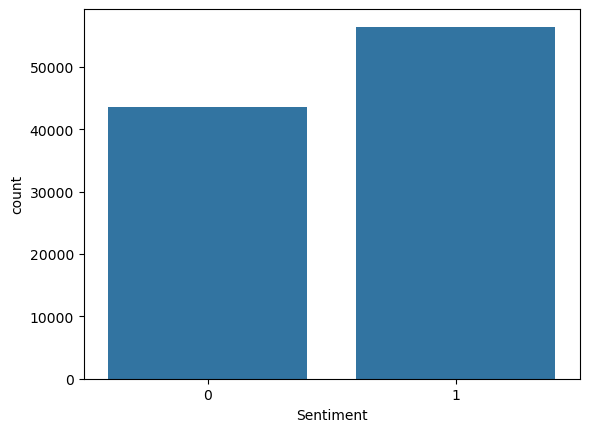

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sentiment',data=df)
plt.show()

In [19]:
df=df.rename({'SentimentText':'message'},axis=1)

In [20]:
df.head()

,Sentiment,message
ItemID,,
1,0,is so sad for my APL frie...
2,0,I missed the New Moon trail...
3,1,omg its already 7:30 :O
4,0,.. Omgaga. Im sooo im gunna CRy. I'...
5,0,i think mi bf is cheating on me!!! ...


In [34]:
df.columns

Index(['Sentiment', 'message'], dtype='object')

In [39]:
dummy=df.iloc[:10]

In [47]:
dummy

,Sentiment,message
ItemID,,
1,0,is so sad for my APL frie...
2,0,I missed the New Moon trail...
3,1,omg its already 7:30 :O
4,0,.. Omgaga. Im sooo im gunna CRy. I'...
5,0,i think mi bf is cheating on me!!! ...
6,0,or i just worry too much?
7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
8,0,Sunny Again Work Tomorrow :-| ...
9,1,handed in my uniform today . i miss you ...


In [88]:
comments=''

for val in dummy.message:

    val=str(val) # convert to 
    print(val)
    token=val.split() # split the value 
    print(token)
    for i in range(len(token)): # loop the convert token to lowercase
        token[i]=token[i].lower()
    comments+=" ".join(token)


                     is so sad for my APL friend.............
['is', 'so', 'sad', 'for', 'my', 'APL', 'friend.............']
                   I missed the New Moon trailer...
['I', 'missed', 'the', 'New', 'Moon', 'trailer...']
              omg its already 7:30 :O
['omg', 'its', 'already', '7:30', ':O']
          .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
['..', 'Omgaga.', 'Im', 'sooo', 'im', 'gunna', 'CRy.', "I've", 'been', 'at', 'this', 'dentist', 'since', '11..', 'I', 'was', 'suposed', '2', 'just', 'get', 'a', 'crown', 'put', 'on', '(30mins)...']
         i think mi bf is cheating on me!!!       T_T
['i', 'think', 'mi', 'bf', 'is', 'cheating', 'on', 'me!!!', 'T_T']
         or i just worry too much?        
['or', 'i', 'just', 'worry', 'too', 'much?']
       Juuuuuuuuuuuuuuuuussssst Chillin!!
['Juuuuuuuuuuuuuuuuussssst', 'Chillin!!']
       Sunny Again        Work Tomorrow  :-|       TV Tonight
['Sunny

In [89]:
comments # convert into a single string 

"is so sad for my apl friend.............i missed the new moon trailer...omg its already 7:30 :o.. omgaga. im sooo im gunna cry. i've been at this dentist since 11.. i was suposed 2 just get a crown put on (30mins)...i think mi bf is cheating on me!!! t_tor i just worry too much?juuuuuuuuuuuuuuuuussssst chillin!!sunny again work tomorrow :-| tv tonighthanded in my uniform today . i miss you alreadyhmmmm.... i wonder how she my number @-)"

In [90]:
comments=''
for val in df['message']:
    val=str(val)
    token=val.split()  # val and token are initialised at every iteration

    for i in range(len(token)):
        token[i]=token[i].lower() 
        
    comments+=' '.join(token)+' '




# Wordcloud

In [79]:
!pip install wordcloud

In [81]:
from wordcloud import WordCloud,STOPWORDS

In [82]:
stopwords=set(STOPWORDS)

In [92]:
wordcloud=WordCloud(
    width=800,
    height=800,
    stopwords=stopwords,
    min_font_size=10
    
).generate(comments)

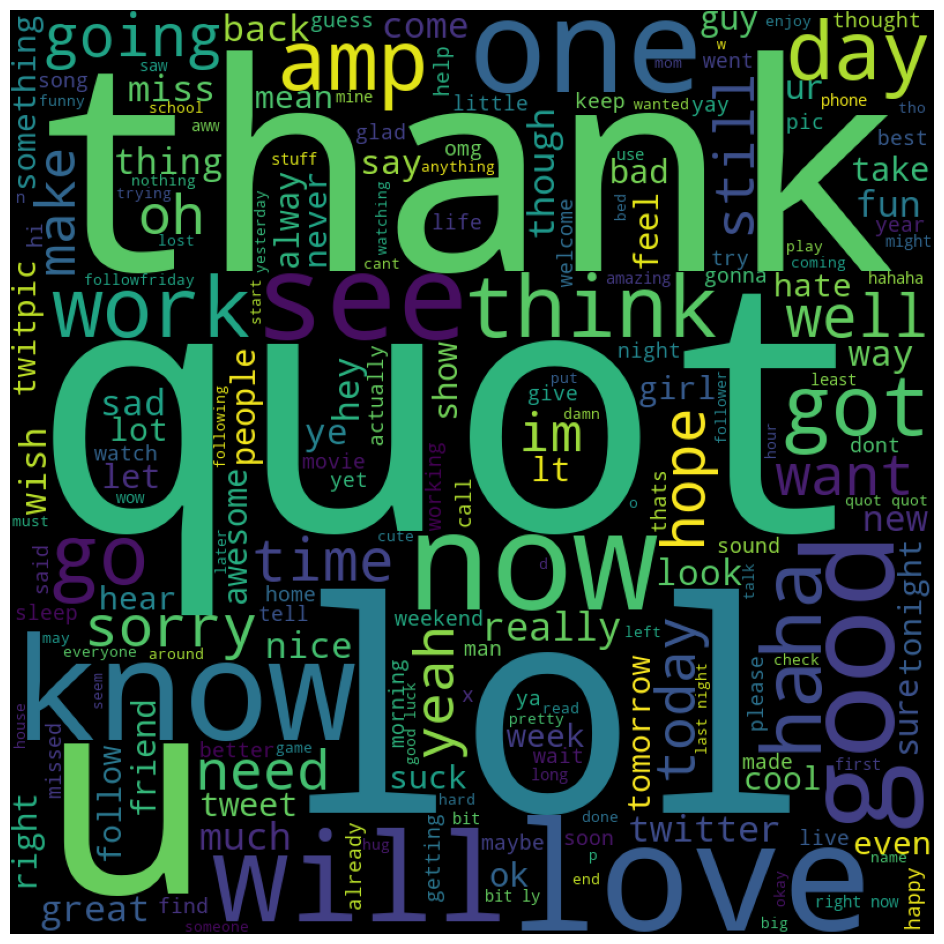

In [93]:
plt.figure(figsize=(12,12)) 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [94]:
import string

for punctuation in string.punctuation:
    print(punctuation)

!
"
#
$
%
&
'
(
)
*
+
,
-
.
/
:
;
<
=
>
?
@
[
\
]
^
_
`
{
|
}
~


In [103]:
text='hellohttps://xxx hel'

In [104]:
text=re.sub(r'http\S+',' ',text)
print(text)

hello  hel


In [117]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vkovi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [118]:
import re
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


def cleaning_text(text):
    # Removing urls
    text=re.sub(r'http\S+',' ',text)

    # Remove @ usernames
    text=re.sub(r'@\w+',' ',text)

    #Remove # mentions
                
    text=re.sub(r'#\w+',' ',text)

    # Remove html tags

    text=re.sub(r'<.*?>',' ',text)

    # Removing Stopwords
    text=text.split()
    text=' '.join([word for word in text if not word in stop_words])

   # Removing Punctuations
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text

In [119]:
df['msg']=df['message'].apply(lambda x: cleaning_text(x))

In [120]:
df

,Sentiment,message,msg
ItemID,,,
1,0,is so sad for my APL frie...,sad APL friend
2,0,I missed the New Moon trail...,I missed New Moon trailer
3,1,omg its already 7:30 :O,omg already 730 O
4,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy Ive dentist since...
5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating me TT
...,...,...,...
99996,0,@Cupcake seems like a repeating problem hop...,seems like repeating problem hope able find so...
99997,1,@cupcake__ arrrr we both replied to each other...,arrrr replied different tweets time ill see t...
99998,0,@CuPcAkE_2120 ya i thought so,ya thought


# X and y

In [130]:
X=df.iloc[:,2]

In [131]:
y=df.iloc[:,0]

## Vectorize the sentences

In [126]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [132]:
cv=CountVectorizer()
X=cv.fit_transform(X)

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [136]:
X_test.shape

(19998, 65524)

# ML

In [137]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## # Logistic Regression


In [138]:
from sklearn.linear_model import LogisticRegression
LogisticR = LogisticRegression()
LogisticR.fit(X_train, y_train) 
y_pred = LogisticR.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
LR = accuracy_score(y_test, y_pred)

[[5634 3072]
 [2023 9269]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69      8706
           1       0.75      0.82      0.78     11292

    accuracy                           0.75     19998
   macro avg       0.74      0.73      0.74     19998
weighted avg       0.74      0.75      0.74     19998

0.7452245224522452


## Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=10, random_state=0)
RandomForest.fit(X_train, y_train) 
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
RF = accuracy_score(y_test, y_pred)

[[5634 3072]
 [2023 9269]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69      8706
           1       0.75      0.82      0.78     11292

    accuracy                           0.75     19998
   macro avg       0.74      0.73      0.74     19998
weighted avg       0.74      0.75      0.74     19998

0.7452245224522452


# AdaBoost Classifier

In [140]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)
AdaBoost.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = AdaBoost.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
AB= accuracy_score(y_test, y_pred)

C:\Users\vkovi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[4229 4477]
 [1564 9728]]
              precision    recall  f1-score   support

           0       0.73      0.49      0.58      8706
           1       0.68      0.86      0.76     11292

    accuracy                           0.70     19998
   macro avg       0.71      0.67      0.67     19998
weighted avg       0.70      0.70      0.68     19998

0.697919791979198


## SGD Classifier

In [141]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
SGD.fit(X_train, y_train)
SGDClassifier(max_iter=5)
y_pred = SGD.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
SGDA = accuracy_score(y_test, y_pred)

[[5328 3378]
 [1816 9476]]
              precision    recall  f1-score   support

           0       0.75      0.61      0.67      8706
           1       0.74      0.84      0.78     11292

    accuracy                           0.74     19998
   macro avg       0.74      0.73      0.73     19998
weighted avg       0.74      0.74      0.74     19998

0.7402740274027403


C:\Users\vkovi\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


 # KNeighbors Classifier


In [142]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
KNNA = accuracy_score(y_test, y_pred)

[[5052 3654]
 [3250 8042]]
              precision    recall  f1-score   support

           0       0.61      0.58      0.59      8706
           1       0.69      0.71      0.70     11292

    accuracy                           0.65     19998
   macro avg       0.65      0.65      0.65     19998
weighted avg       0.65      0.65      0.65     19998

0.6547654765476547


# Decision Tree Classifier


In [143]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
DT = accuracy_score(y_test, y_pred)

[[5652 3054]
 [3358 7934]]
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      8706
           1       0.72      0.70      0.71     11292

    accuracy                           0.68     19998
   macro avg       0.67      0.68      0.68     19998
weighted avg       0.68      0.68      0.68     19998

0.6793679367936794


# Voting Classifier

In [146]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.svm import SVC
seed = 7
kfold = model_selection.KFold(n_splits=10)
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = RandomForestClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
#warnings.simplefilter("ignore")

print(ensemble)
ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

E= accuracy_score(y_test, y_pred)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('cart', RandomForestClassifier()),
                             ('svm', SVC())])
[[5555 3151]
 [1821 9471]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      8706
           1       0.75      0.84      0.79     11292

    accuracy                           0.75     19998
   macro avg       0.75      0.74      0.74     19998
weighted avg       0.75      0.75      0.75     19998

0.7513751375137514


In [147]:
    import joblib

In [149]:
file_name='model.sav'
joblib.dump(ensemble,file_name)

['model.sav']